<a href="https://colab.research.google.com/github/NatarajMaddala/Tensorflow/blob/main/Image%20Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-05-13 13:44:54--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 2404:6800:4008:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   114MB/s    in 0.6s    

2020-05-13 13:44:55 (114 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import zipfile

In [ ]:
import os
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
tcd = os.path.join(train_dir, 'cats')
tdd = os.path.join(train_dir, 'dogs')
vcd = os.path.join(validation_dir, 'cats')
vdd = os.path.join(validation_dir, 'dogs')

In [ ]:
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])


In [ ]:
"""train_gen = ImageDataGenerator(rescale=1/255)
valid_gen = ImageDataGenerator(rescale=1/255)
traini = train_gen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size= 20,
        class_mode='binary'
)
validi = valid_gen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size= 20,
        class_mode='binary'
)"""

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history=model.fit(traini, epochs=15, validation_data=validi, verbose=1, steps_per_epoch=100, validation_steps=50)

Epoch 1/15
100/100 [==============================] - 20s 202ms/step - loss: 0.6998 - accuracy: 0.6475 - val_loss: 0.7330 - val_accuracy: 0.6190
Epoch 2/15
100/100 [==============================] - 20s 204ms/step - loss: 0.6065 - accuracy: 0.7055 - val_loss: 0.5120 - val_accuracy: 0.7470
Epoch 3/15
100/100 [==============================] - 21s 205ms/step - loss: 0.6199 - accuracy: 0.6880 - val_loss: 0.5253 - val_accuracy: 0.7680
Epoch 4/15
100/100 [==============================] - 20s 203ms/step - loss: 0.5816 - accuracy: 0.7125 - val_loss: 0.5495 - val_accuracy: 0.7210
Epoch 5/15
100/100 [==============================] - 20s 205ms/step - loss: 0.5749 - accuracy: 0.7000 - val_loss: 0.6090 - val_accuracy: 0.7300
Epoch 6/15
100/100 [==============================] - 20s 202ms/step - loss: 0.5786 - accuracy: 0.7115 - val_loss: 0.4678 - val_accuracy: 0.7720
Epoch 7/15
100/100 [==============================] - 20s 202ms/step - loss: 0.5593 - accuracy: 0.7095 - val_loss: 0.4992 - val_ac

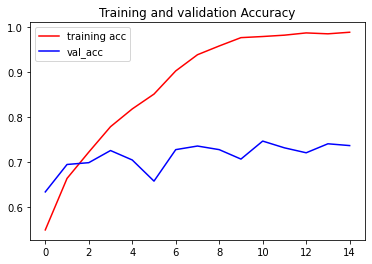

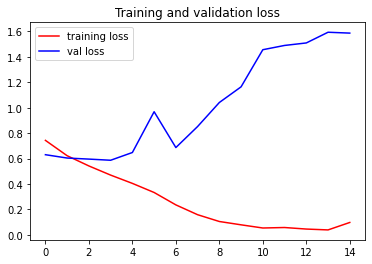

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs= range(len(acc))
plt.plot(epochs, acc, 'r', label='training acc')
plt.plot(epochs, val_acc, 'b', label='val_acc')
plt.title('Training and validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'r', label='training loss')
plt.plot(epochs, val_loss, 'b', label='val loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
train_gen = ImageDataGenerator(
    rescale=1/255,
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    shear_range = 0.2,
    zoom_range= 0.2,
    rotation_range=0.4,
    fill_mode= 'nearest',
    horizontal_flip= True
)
valid_gen = ImageDataGenerator(rescale=1/255)
traini = train_gen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size= 20,
        class_mode='binary'
)
validi = valid_gen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size= 20,
        class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


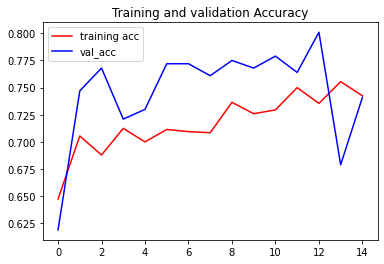

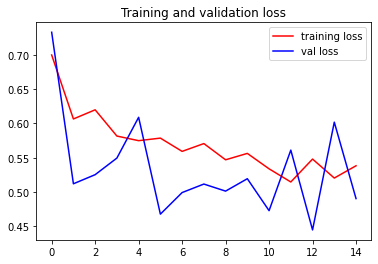

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs= range(len(acc))
plt.plot(epochs, acc, 'r', label='training acc')
plt.plot(epochs, val_acc, 'b', label='val_acc')
plt.title('Training and validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'r', label='training loss')
plt.plot(epochs, val_loss, 'b', label='val loss')
plt.title('Training and validation loss')
plt.legend()